### Bisection method 
Solve equation $f(x) = 0$, conditional on $x \in [a, b] \subset \mathbb{R}$ such that $f(a)f(b) < 0$

Algorithm: similar to binary search, but in **continuous space**

In [30]:
def bisection(f, a=0, b=1, tolerance=1e-6, callback=None, maxiter=100):
    '''
    Bisection method for solving equation f(x)=0
    on the interval [a,b], with given tolerance and number of iterations.
    Callback function is invoked at each iteration if given.
    '''
    if f(a)*f(b)>0:
        raise ValueError('The function has to have opposite signs at the bounderies')
    
    for i in range(maxiter):
        err = abs(a-b)
        x = (a+b)/2
        if callback!=None:
            callback(x, iter=i,a=a,b=b,err=err)
        if f(a)*f(x)>0:
            a = x
        else:
            b = x
            
        if err < tolerance:
            break
    else:
        raise RuntimeError('Failed to converge in %d iteraions'%maxiter)
    
    return x

In [63]:
f = lambda x: -40 * x ** 5 + 5 * x + 1 + 4 * x ** 14
a,b = -3, -.5
def callback(x, iter, **kwargs):
    print('%d x =%1.5f, '%(iter,x))
x = bisection(f, a, b, callback=callback)
print('Solution is x =%1.3f, f(x)=%1.4f' % (x, abs(f(x))))

0 x =-1.75000, 
1 x =-1.12500, 
2 x =-0.81250, 
3 x =-0.65625, 
4 x =-0.57812, 
5 x =-0.53906, 
6 x =-0.51953, 
7 x =-0.52930, 
8 x =-0.52441, 
9 x =-0.52686, 
10 x =-0.52808, 
11 x =-0.52747, 
12 x =-0.52777, 
13 x =-0.52792, 
14 x =-0.52785, 
15 x =-0.52781, 
16 x =-0.52783, 
17 x =-0.52782, 
18 x =-0.52781, 
19 x =-0.52781, 
20 x =-0.52781, 
21 x =-0.52781, 
22 x =-0.52781, 
Solution is x =-0.528, f(x)=0.0000


Converged in 23 steps


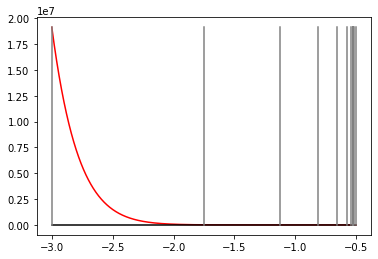

In [64]:
import numpy as np
import matplotlib.pyplot as plt
xd = np.linspace(a,b, 1000)
plt.plot(xd, f(xd), c='red')
plt.plot([a,b], [0,0], c='black') #plot zero line
ylim = [f(a), min(f(b), 0)]
plt.plot([a, a], ylim, c="grey")
plt.plot([b, b], ylim, c='grey')
def plot_step(x, **kwargs):
    plot_step.counter +=1
    plt.plot([x,x], ylim, c='grey')
plot_step.counter = 0
bisection(f, a, b, callback=plot_step)
print('Converged in %d steps' %plot_step.counter)
plt.show()

### Newton-Rapson method
General form $f(x)=0$
* Equation solving 
* Finding max/min based on FOC, then $f(x) = Q'(x)$

Algorithm:
1. Start with some good guess $x_0$ not too far from the solution 
2. Newton step: $x_{i+1} = x_i - \dfrac{f'(x_i)}{f''(x_i)}$
3. Iterate untill convergence in some metric


### Derivation for Newton method using Taylor series expansion
$$
f(x) = \sum_{k=0}^{\infty}\dfrac{f^{(k)}(x_0)}{k!}(x-x_0)^k
$$

Take first two terms, assume f(x) is solution, and let x_0 = x_i and x = x_{i+1}

$$
0 = f(x) = f(x_i) + f'(x_i)(x_{i+1}-x_i) \Rightarrow x_{i+1} = x_i - \dfrac{f(x_i)}{f'(x_i)}
$$


In [75]:
def newton(fun, grad, x_0, tol=1e-6, maxiter=100, callback=None):
    '''
    Newton method for solving equation f(x)=0
    with given tolerance and number of iteraions.
    Callback function is invoked at each iteraion if given
    '''
    for i in range(maxiter):
        x1 = x_0 - fun(x_0)/grad(x_0)
        err = abs(x1-x_0)
        if callback != None: callback(x0 = x_0, x1 = x1, err=err, iter=i)
        if err < tol:
            break
        x_0 = x1
    else:
        raise RuntimeError('Failed to converge in %d iterations'%maxiter)
    
    return x1

In [86]:
f = lambda x: -4 * x ** 3 + 5*x + 1
grad = lambda x: -12 * x **2 + 5
def printiter(x0,x1,iter, **kwargs):
    print('%d x0=%1.16f x1=%1.16f' %(iter, x0, x1))
x = newton(f, grad, x_0 = -2.5, callback=printiter)
print('Solution is x=%1.3f, f(x)=%1.12f' %(x, f(x)))

0 x0=-2.5000000000000000 x1=-1.7714285714285714
1 x0=-1.7714285714285714 x1=-1.3311494495055727
2 x0=-1.3311494495055727 x1=-1.0987751438398277
3 x0=-1.0987751438398277 x1=-1.0131526300716971
4 x0=-1.0131526300716971 x1=-1.0002861679668720
5 x0=-1.0002861679668720 x1=-1.0000001402755980
6 x0=-1.0000001402755980 x1=-1.0000000000000338
Solution is x=-1.000, f(x)=0.000000000000
